In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

path = "/content/drive/MyDrive/ImageProcessing/Assignment-27"

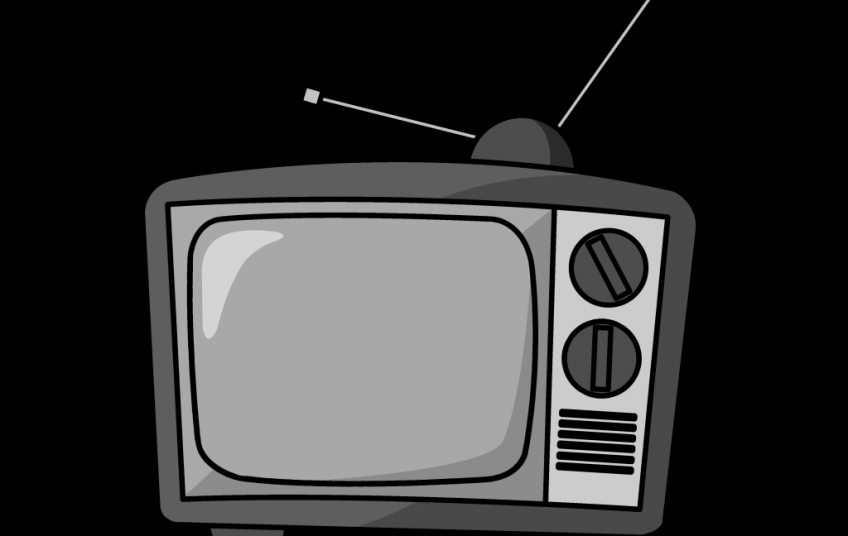

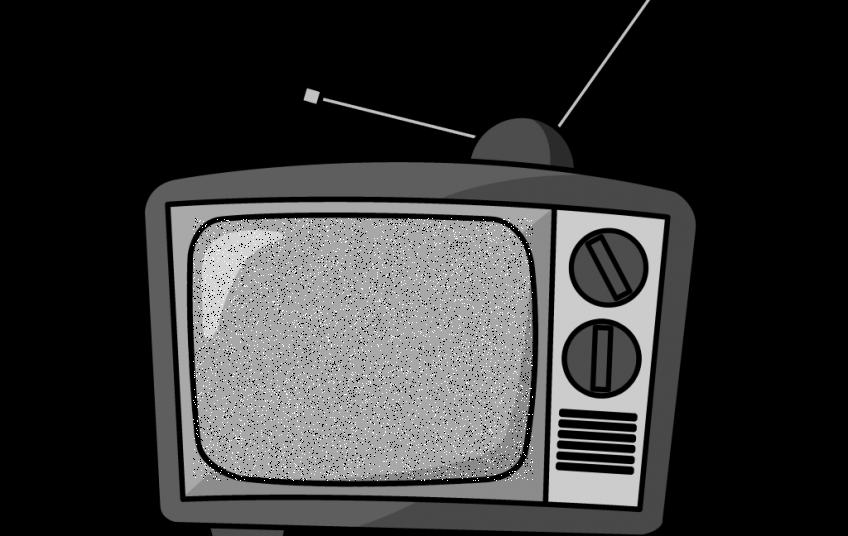

In [6]:
img_ = cv2.imread("/content/drive/MyDrive/ImageProcessing/Assignment-27/inputs/television01.png")
img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
# cv2_imshow(img_gray)

thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 57, 34)
thresh = 255 - thresh
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]


flag = 0
vector = np.zeros((4))

for cnt in contours:

    if cv2.contourArea(cnt) > (img_gray.shape[0] * img_gray.shape[1]) // 6:

        x, y, w, h = cv2.boundingRect(cnt)
        roi = img_gray[y : y + h, x : x + w]
        std = np.std(roi)
        
        if flag == 0:
            min_std = std
            flag = 1

        elif std<min_std:
            vector = x, y, w, h
            img = roi
            min_std = std


noise_mask = []
TV_screen_noise = []

for i in range(20):

    img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    noise_mask =  np.random.randint(0, 21, size = (img.shape[0], img.shape[1]), dtype=int)

    zeros_pixel = np.where(noise_mask == 0)
    one_pixel = np.where(noise_mask == 20)

    image_smal = img_gray[vector[1] : vector[1] + vector[3], vector[0] : vector[0] + vector[2]]

    image_smal[zeros_pixel] = 0
    image_smal[one_pixel] = 255

    img_gray[vector[1] : vector[1] + vector[3], vector[0] : vector[0] + vector[2]] = image_smal
    TV_screen_noise.append(img_gray)


import imageio

with imageio.get_writer(os.path.join(path, "result/TV_screen_noise.gif"), mode="I") as writer:

    for idx, img in enumerate(TV_screen_noise):
        writer.append_data(img)

cv2_imshow(TV_screen_noise[1])